In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
df.head(10)


,name,enrollment,language,rating,level,duration,instructor,offered by,instructor_rate
0,The Science of Success: What Researchers Know ...,173770,English,4.8,Beginner,11,Paula Caproni,University of Michigan,4.8
1,Microsoft Azure Databricks for Data Engineering,12942,English,4.4,Intermediate,21,Microsoft,Microsoft,4.2
2,Finance for Everyone: Debt,15586,English,4.8,Other,11,Arshad Ahmad,McMaster University,4.7
3,Basics of Statutory Compliance and Taxation,3123,English,4.8,Intermediate,46,Tally Education Pvt. Ltd,Tally Education,4.7
4,Preventing Chronic Pain: A Human Systems Approach,33519,English,4.7,Beginner,44,"Dr. James Fricton, DDS, MS",University of Minnesota,4.8
5,Professional Selling: Step 1 - Think Like a Hi...,16630,English,4.7,Beginner,7,"Scott Inks, Terry Loe",University System of Georgia,5.0
6,Specialty Topics: Biology Across Disciplines,2636,English,4.5,Beginner,12,Melanie Peffer,University of Colorado Boulder,4.8
7,Visual Perception,2413,English,4.7,Beginner,10,Shree Nayar,Columbia University,4.7
8,Fundamental Sports related Musculoskeletal Ana...,2892,English,4.5,Beginner,4,CUHK Sports Medicine Team,The Chinese University of Hong Kong,4.7
9,Influence,23485,English,4.7,Beginner,9,Cade Massey,University of Pennsylvania,4.7


## Question 1: Find out the fond of people on the duration of courses. Will the duration affect the choice?

In [3]:
duration_df = df[['enrollment', 'duration']]
duration_df['field'] = np.random.choice(['A', 'B', 'C', 'D'], size=len(df))
duration_df['rating_category'] = duration_df.apply(lambda row: 'Short' if row['duration'] < 32 else 'Medium' if 32 < row['duration'] < 65 else 'Long' if row['duration'] > 65 else None, axis=1)
duration_df

/tmp/ipykernel_4549/15580196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df['field'] = np.random.choice(['A', 'B', 'C', 'D'], size=len(df))
/tmp/ipykernel_4549/15580196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df['rating_category'] = duration_df.apply(lambda row: 'Short' if row['duration'] < 32 else 'Medium' if 32 < row['duration'] < 65 else 'Long' if row['duration'] > 65 else None, axis=1)


,enrollment,duration,field,rating_category
0,173770,11,C,Short
1,12942,21,B,Short
2,15586,11,B,Short
3,3123,46,B,Medium
4,33519,44,C,Medium
...,...,...,...,...
1757,1651,18,B,Short
1758,7815,7,B,Short
1759,28386,6,C,Short
1760,5438,11,C,Short


In [4]:
most_common_value = duration_df['field'].mode().iloc[0]

# Create a new DataFrame with only rows containing the most common value
only_field_df = duration_df[duration_df['field'] == most_common_value]
only_field_df

,enrollment,duration,field,rating_category
6,2636,12,D,Short
7,2413,10,D,Short
9,23485,9,D,Short
18,19209,8,D,Short
19,67032,11,D,Short
...,...,...,...,...
1726,2229,19,D,Short
1735,208731,7,D,Short
1748,16225,6,D,Short
1755,18652,28,D,Short


In [5]:
en_du_df = only_field_df.groupby(['rating_category'])['enrollment'].agg(['mean'])
en_du_df.columns = ['average_enrollment']
en_du_df

,average_enrollment
rating_category,
Long,44511.333333
Medium,95857.555556
Short,41354.288939


## Question 2: Evaluate the courses offered by university if the recommend is good or not

In [6]:
avg_rating = df['rating'].mean()
school_offer = df.groupby(['offered by'])['rating'].agg(['mean'])
school_offer.columns = ['average_rating']
school_offer = school_offer.sort_values(by='average_rating')
school_offer['rating_category'] = ['Lower' if x < avg_rating else 'Equal or Higher' for x in school_offer['average_rating']]
school_offer

,average_rating,rating_category
offered by,,
Databricks,3.700000,Lower
Illinois Tech,3.800000,Lower
NIIT,3.850000,Lower
National Academy of Sports Medicine,4.100000,Lower
USO,4.100000,Lower
...,...,...
Yale University,4.842857,Equal or Higher
Deep Teaching Solutions,4.850000,Equal or Higher
Curtis Institute of Music,4.900000,Equal or Higher


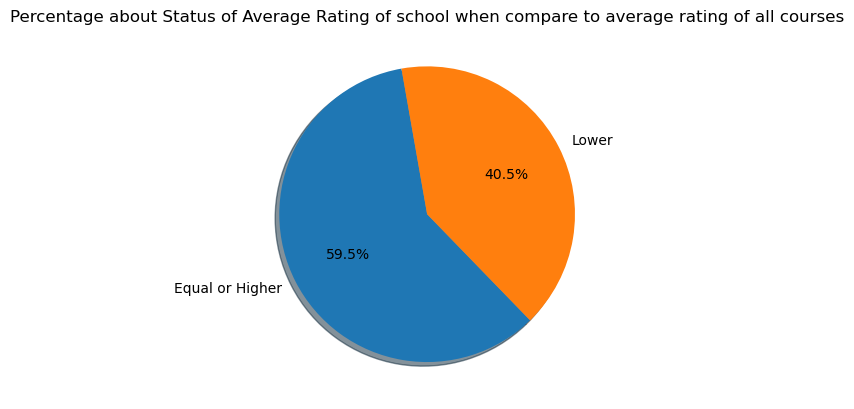

[]

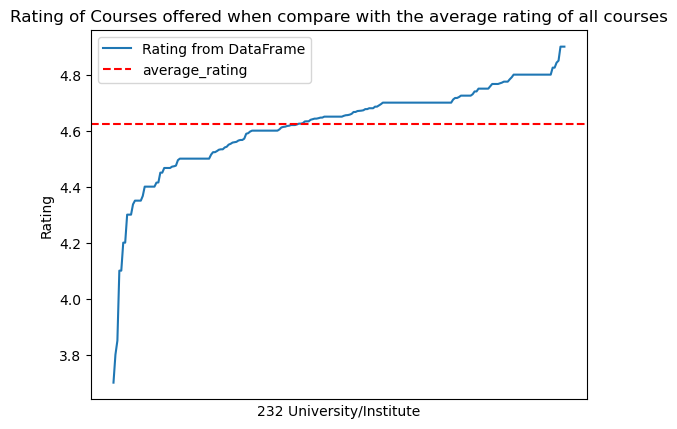

In [7]:
pie_offered = school_offer['rating_category'].value_counts()
fig, ax1 = plt.subplots()
ax1.pie(pie_offered.values, labels=pie_offered.index, autopct='%1.1f%%',shadow={'ox': -0.05, 'edgecolor': 'none', 'shade': 1}, startangle=100)
plt.title('Percentage about Status of Average Rating of school when compare to average rating of all courses')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(school_offer['average_rating'], label='Rating from DataFrame')
ax2.axhline(y=avg_rating, color='red', linestyle='--', label='average_rating')
ax2.set_xlabel('232 University/Institute')
ax2.set_ylabel('Rating')
ax2.set_title('Rating of Courses offered when compare with the average rating of all courses')
ax2.legend()
ax2.set_xticks([])

## Question 3: Check the general level of learner in these years

In [8]:
general_level = df.groupby(['level'])['enrollment'].agg(['sum'])
general_level.columns = ['total_enrollment']
general_level

,total_enrollment
level,
Advanced,2138811
Beginner,40823920
Intermediate,15531503
Other,22831873


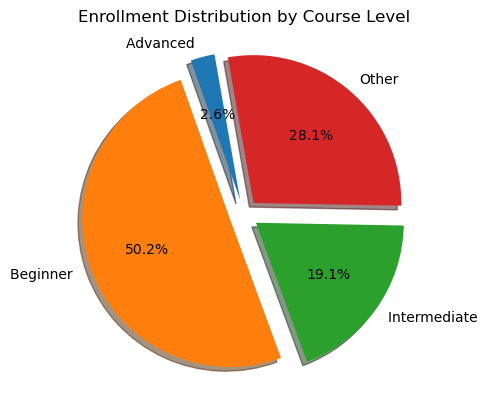

In [9]:
explode = (0.1, 0.1, 0.1, 0.1)  
fig, ax = plt.subplots()
ax.pie(general_level['total_enrollment'], explode=explode, labels=general_level.index, autopct='%1.1f%%',shadow={'ox': -0.05, 'edgecolor': 'none', 'shade': 1}, startangle=100)
plt.title('Enrollment Distribution by Course Level')
plt.show()